In [1]:
import os
import shutil
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
#创建目录，将图片分别放到训练集，验证集和测试集中
original_dataset_dir = 'D:\\data\\dogs-vs-cats\\train'
base_dir = 'D:\\data\\dogs-va-cats-small'
#os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats') 
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs') 
# os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats') 
# os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs') 
# os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats') 
# os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs') 
# os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    source = os.path.join(original_dataset_dir, fname)
    destination = os.path.join(train_cats_dir, fname)
    shutil.copyfile(source, destination)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    source = os.path.join(original_dataset_dir, fname)
    destination = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(source, destination)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3) , activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [4]:
#编译模型
model.compile(loss = 'binary_crossentropy',       #二分类问题用二元交叉熵作为损失函数
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics = ['acc']
             )

C:\Users\李伟豪\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [5]:
#图像数据预处理
# (1) 读取图像文件。
# (2) 将 JPEG 文件解码为 RGB 像素网格。
# (3) 将这些像素网格转换为浮点数张量。
# (4) 将像素值（0~255 范围内）缩放到 [0, 1] 区间
train_datagen = ImageDataGenerator(rescale=1./255)      
val_datagen = ImageDataGenerator(rescale = 1./255)    

train_generator = train_datagen.flow_from_directory(train_dir,     #生成器
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')

validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history = model.fit_generator(train_generator,
                             steps_per_epoch= 100,      #每个批量包含 20 个样本，所以读取完所有 2000 个样本需要 100个批量
                             epochs= 30,
                             validation_data=validation_generator,
                             validation_steps= 50)
model.save('cat_vs_dog_1.h5')

C:\Users\李伟豪\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 29s 279ms/step - loss: 0.6931 - acc: 0.5350 - val_loss: 0.6647 - val_acc: 0.6250
Epoch 2/30
100/100 [==============================] - 28s 281ms/step - loss: 0.6558 - acc: 0.6110 - val_loss: 0.6252 - val_acc: 0.6500
Epoch 3/30
100/100 [==============================] - 28s 278ms/step - loss: 0.6006 - acc: 0.6790 - val_loss: 0.5956 - val_acc: 0.6840
Epoch 4/30
100/100 [==============================] - 26s 263ms/step - loss: 0.5575 - acc: 0.7165 - val_loss: 0.6422 - val_acc: 0.6480
Epoch 5/30
100/100 [==============================] - 26s 262ms/step - loss: 0.5342 - acc: 0.7175 - val_loss: 0.6742 - val_acc: 0.6160
Epoch 6/30
100/100 [==============================] - 26s 259ms/step - loss: 0.4962 - acc: 0.7555 - val_loss: 0.5919 - val_acc: 0.6830
Epoch 7/30
100/100 [==============================] - 26s 261ms/step - loss: 0.4699 - acc: 0.7830 - val_loss: 0.5819 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 2

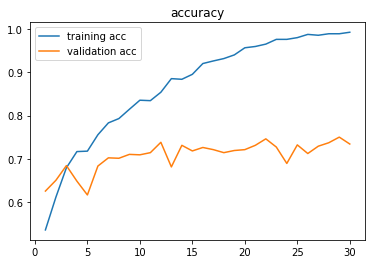

In [7]:
#绘制曲线
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['acc'], label = 'training acc')
plt.plot(epochs, history.history['val_acc'], label = 'validation acc')
plt.title('accuracy')
plt.legend()

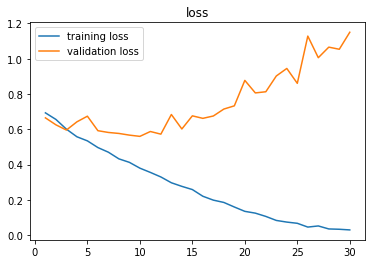

In [9]:
plt.plot(epochs, history.history['loss'], label = 'training loss')
plt.plot(epochs, history.history['val_loss'], label = 'validation loss')
plt.title('loss')
plt.legend()

In [3]:
#使用数据增强和正则化重新构造模型，来降低过拟合
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))             #添加dropout层正则化
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,          #数据增强
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)   #不能对测试集进行数据增强

train_generator = train_datagen.flow_from_directory(train_dir,
 target_size=(150, 150), 
 batch_size=32,
 class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
 validation_dir,
 target_size=(150, 150),
 batch_size=32,
 class_mode='binary')

history = model.fit_generator(
 train_generator,
 steps_per_epoch=63,
 epochs=100,
 validation_data=validation_generator,
 validation_steps=32)

model.save('cat_vs_dog_2.h5')

C:\Users\李伟豪\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


C:\Users\李伟豪\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
63/63 [==============================] - 26s 405ms/step - loss: 0.6936 - acc: 0.5085 - val_loss: 0.6864 - val_acc: 0.5010
Epoch 2/100
63/63 [==============================] - 25s 400ms/step - loss: 0.6849 - acc: 0.5350 - val_loss: 0.6648 - val_acc: 0.5840
Epoch 3/100
63/63 [==============================] - 28s 445ms/step - loss: 0.6714 - acc: 0.5845 - val_loss: 0.6517 - val_acc: 0.5950
Epoch 4/100
63/63 [==============================] - 27s 434ms/step - loss: 0.6707 - acc: 0.5805 - val_loss: 0.6518 - val_acc: 0.5990
Epoch 5/100
63/63 [==============================] - 26s 403ms/step - loss: 0.6672 - acc: 0.5725 - val_loss: 0.6474 - val_acc: 0.6070
Epoch 6/100
63/63 [==============================] - 25s 395ms/step - loss: 0.6533 - acc: 0.6070 - val_loss: 0.6742 - val_acc: 0.5830
Epoch 7/100
63/63 [==============================] - 25s 398ms/step - loss: 0.6513 - acc: 0.6105 - val_loss: 0.6168 - val_acc: 0.6570
Epoch 8/100
63/63 [==============================] - 25s 397ms

Epoch 62/100
63/63 [==============================] - 27s 424ms/step - loss: 0.4618 - acc: 0.7755 - val_loss: 0.4785 - val_acc: 0.7670
Epoch 63/100
63/63 [==============================] - 26s 405ms/step - loss: 0.4558 - acc: 0.7820 - val_loss: 0.4999 - val_acc: 0.7560
Epoch 64/100
63/63 [==============================] - 26s 407ms/step - loss: 0.4614 - acc: 0.7845 - val_loss: 0.4580 - val_acc: 0.7870
Epoch 65/100
63/63 [==============================] - 26s 414ms/step - loss: 0.4637 - acc: 0.7865 - val_loss: 0.4571 - val_acc: 0.7840
Epoch 66/100
63/63 [==============================] - 26s 415ms/step - loss: 0.4550 - acc: 0.7825 - val_loss: 0.4706 - val_acc: 0.7790
Epoch 67/100
63/63 [==============================] - 27s 431ms/step - loss: 0.4458 - acc: 0.7910 - val_loss: 0.4565 - val_acc: 0.7850
Epoch 68/100
63/63 [==============================] - 27s 433ms/step - loss: 0.4540 - acc: 0.7875 - val_loss: 0.4870 - val_acc: 0.7650
Epoch 69/100
63/63 [==============================] - 2

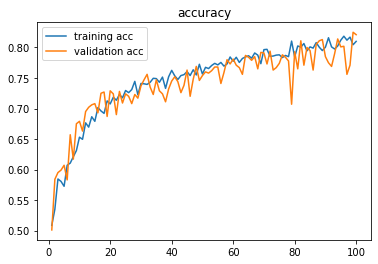

In [4]:
#绘制曲线
epochs = range(1, len(history.history['acc'])+1)
plt.plot(epochs, history.history['acc'], label = 'training acc')
plt.plot(epochs, history.history['val_acc'], label = 'validation acc')
plt.title('accuracy')
plt.legend()

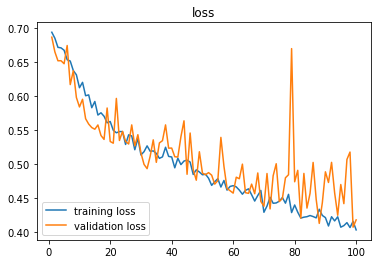

In [5]:
plt.plot(epochs, history.history['loss'], label = 'training loss')
plt.plot(epochs, history.history['val_loss'], label = 'validation loss')
plt.title('loss')
plt.legend()

In [10]:
#使用预训练的卷积神经网络
#1. 特征提取(使用数据增强)
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',     #模型初始化的权重检查点
                 include_top = False,          #不使用其中的密集连接分类器
                 input_shape= (150, 150,3))
                  
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [11]:
#扩展模型
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
#编译模型
model.compile(loss = 'binary_crossentropy',       #二分类问题用二元交叉熵作为损失函数
              optimizer = optimizers.RMSprop(lr=2e-5),
              metrics = ['acc']
             )

conv_base.trainable = False    #冻结卷积基， 仅训练密集连接层的权重

C:\Users\李伟豪\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [13]:
history = model.fit_generator(
 train_generator,
 steps_per_epoch=100,
 epochs=30,
 validation_data=validation_generator,
 validation_steps=50)

C:\Users\李伟豪\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
  5/100 [>.............................] - ETA: 5:30 - loss: 0.7930 - acc: 0.4722

KeyboardInterrupt: 

In [14]:
# 微调模型
# (1) 在已经训练好的基网络（base network）上添加自定义网络。
# (2) 冻结基网络。
# (3) 训练所添加的部分。
# (4) 解冻基网络的一些层。
# (5) 联合训练解冻的这些层和添加的部分。
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
history = model.fit_generator(
 train_generator,
 steps_per_epoch=100,
 epochs=100,
 validation_data=validation_generator,
 validation_steps=50)